In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
datos = pd.read_csv('events.csv', low_memory=False)

In [19]:
datos.size

23259624

In [21]:
pd.set_option("display.max_columns",80)

In [22]:
pd.get_option("display.max_columns")

80

In [23]:
datos.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
datos["new_vs_returning"].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

# ¿Que tipo de campaña de publicidad es mejor?

In [36]:
conteoDeCampania = datos["campaign_source"].value_counts()

Text(0,0.5,'Campaña')

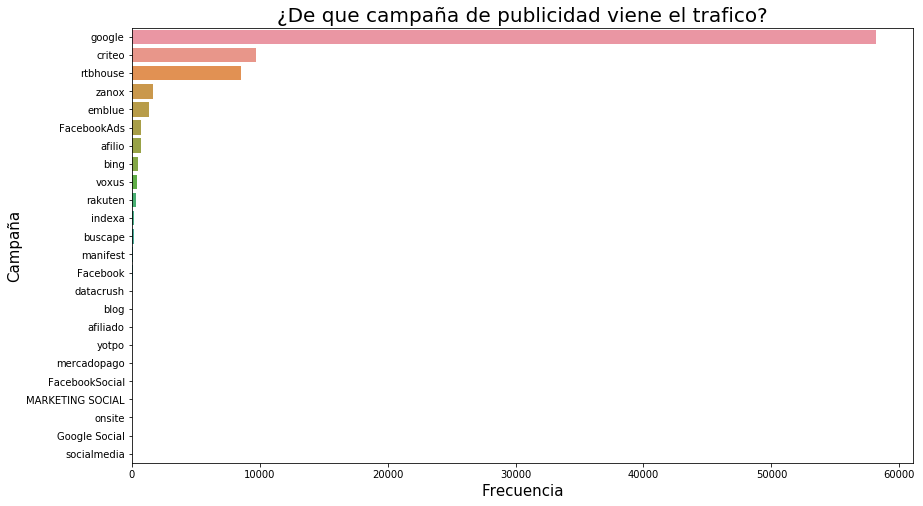

In [40]:
plt.figure(figsize=[14,8])
g = sns.barplot(x=conteoDeCampania.values, y=conteoDeCampania.index,orient='h')
g.set_title("¿De que campaña de publicidad viene el trafico?",fontsize=20)
g.set_xlabel("Frecuencia",fontsize=15)
g.set_ylabel("Campaña",fontsize=15)

## Conclusiones: 
Podemos determinar que el mayor trafico recibido por publicidad es de Google, criteo y rtbhouse. 